In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train_df = pd.read_csv(r"../data/raw/train.csv")
eval_df = pd.read_csv(r"../data/raw/eval.csv")

In [3]:
train_df.head(1)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta


In [4]:
eval_df.head(1)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2020-01-31,184000.0,168450.0,123.333333,109.8998,35.0,30.0,34.0,37.0,50.0,...,4598.0,964.0,169000.0,5690.0,414.0,10573.0,10573.0,5089.0,164839.734849,Chicago-Naperville-Elgin


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585244 entries, 0 to 585243
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          585244 non-null  object 
 1   median_sale_price             585244 non-null  float64
 2   median_list_price             585244 non-null  float64
 3   median_ppsf                   585244 non-null  float64
 4   median_list_ppsf              585244 non-null  float64
 5   homes_sold                    585244 non-null  float64
 6   pending_sales                 585244 non-null  float64
 7   new_listings                  585244 non-null  float64
 8   inventory                     585244 non-null  float64
 9   median_dom                    585244 non-null  float64
 10  avg_sale_to_list              585244 non-null  float64
 11  sold_above_list               585244 non-null  float64
 12  off_market_in_two_weeks       585244 non-nul

In [6]:
train_df.duplicated().sum()

np.int64(0)

In [7]:
train_df.city_full.value_counts()


city_full
New York-Newark-Jersey City            78020
Chicago-Naperville-Elgin               35344
Los Angeles-Long Beach-Anaheim         33840
Philadelphia-Camden-Wilmington         31396
DC_Metro                               29516
Pittsburgh                             27824
Boston-Cambridge-Newton                25568
Dallas-Fort Worth-Arlington            23594
Houston-The Woodlands-Sugar Land       20586
Minneapolis-St. Paul-Bloomington       20398
Detroit-Warren-Dearborn                20022
St. Louis                              19834
Atlanta-Sandy Springs-Alpharetta       19082
Miami-Fort Lauderdale-Pompano Beach    17014
San Francisco-Oakland-Berkeley         15604
Seattle-Tacoma-Bellevue                14664
Phoenix-Mesa-Chandler                  14006
Cincinnati                             14006
Baltimore-Columbia-Towson              13818
Riverside-San Bernardino-Ontario       13724
Tampa-St. Petersburg-Clearwater        12126
Denver-Aurora-Lakewood                 11750


In [8]:
print(train_df.shape)
duplicated_rows = train_df[train_df.duplicated()].shape[0]
print("duplicated_rows:", duplicated_rows)

duplicated_rows = train_df[train_df.duplicated(subset=train_df.columns.difference(['date', 'year']))].shape[0]
print("duplicated_rows excluding date column:", duplicated_rows)

(585244, 39)
duplicated_rows: 0
duplicated_rows excluding date column: 6321


In [9]:
# Delete duplicates
train_df = train_df.drop_duplicates(subset=train_df.columns.difference(['date', 'year']), keep=False)

print(train_df.shape)

duplicated_rows = train_df[train_df.duplicated()].shape[0]
print("duplicated_rows:", duplicated_rows)

duplicated_rows = train_df[train_df.duplicated(subset=train_df.columns.difference(['date', 'year']))].shape[0]
print("duplicated_rows excluding date column:", duplicated_rows)

(576860, 39)
duplicated_rows: 0
duplicated_rows excluding date column: 0


In [11]:
print(eval_df.shape)


duplicated_rows = eval_df[eval_df.duplicated()].shape[0]
print("duplicated_rows:", duplicated_rows)

duplicated_rows = eval_df[eval_df.duplicated(subset=eval_df.columns.difference(['date', 'year']))].shape[0]
print("duplicated_rows excluding date column:", duplicated_rows)

(149424, 39)
duplicated_rows: 0
duplicated_rows excluding date column: 726


In [12]:
# Delete duplicates
eval_df = eval_df.drop_duplicates(subset=eval_df.columns.difference(['date', 'year']), keep=False)

print(eval_df.shape)


duplicated_rows = eval_df[eval_df.duplicated()].shape[0]
print("duplicated_rows:", duplicated_rows)

duplicated_rows = eval_df[eval_df.duplicated(subset=eval_df.columns.difference(['date', 'year']))].shape[0]
print("duplicated_rows excluding date column:", duplicated_rows)

(148449, 39)
duplicated_rows: 0
duplicated_rows excluding date column: 0


In [13]:
train_df.drop('city_full', axis=1, inplace=True)
eval_df.drop('city_full', axis=1, inplace=True)

In [14]:
print(train_df.shape)
print(eval_df.shape)

(576860, 38)
(148449, 38)


In [ ]:
def find_outliers_per_city(df, col):
    outlier_indices = []
    
    # Group by city so we compare apples to apples
    for city, group in df.groupby('city'):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Find rows in THIS city that are outliers
        local_outliers = group[(group[col] < lower_limit) | (group[col] > upper_limit)]
        outlier_indices.extend(local_outliers.index)
        
    return list(set(outlier_indices))

# usage
bad_indices = find_outliers_per_city(train_df, 'median_sale_price')
print(f"Found {len(bad_indices)} rows that are outliers relative to their specific city.")

Found 25241 rows that are outliers relative to their specific city.


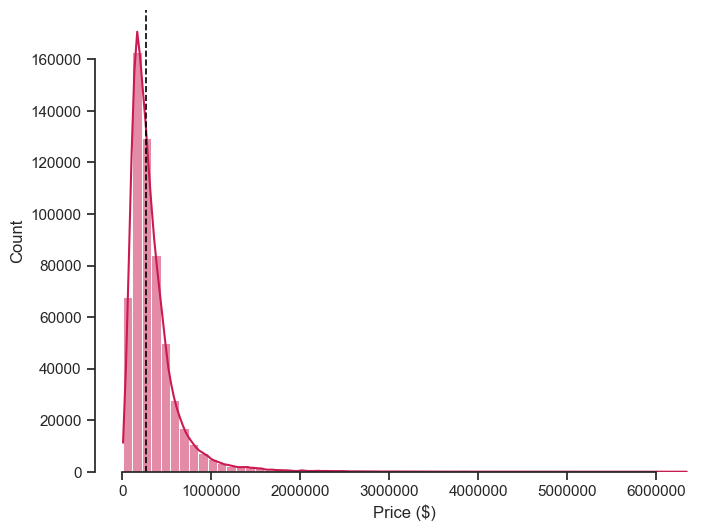

In [18]:
# Distribution of house prices across the dataset 
df = train_df
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df["price"].dropna(), bins=60, kde=True, color=sns.color_palette("rocket_r", 1)[0], ax=ax)
median_price = df["price"].median()
ax.axvline(median_price, ls="--", lw=1.2, color="black")
ax.set_xlabel("Price ($)")
ax.set_ylabel("Count")
sns.despine(trim=True)
ax.grid(False)
ax.ticklabel_format(axis="x", style="plain")
plt.show()

In [20]:
train_df.to_csv(r"../data/interim/train_1.csv", index=False)
eval_df.to_csv(r"../data/interim/eval_1.csv", index=False)